##**Binary classification model that can predict male/female from Bengali handwritten digits**

- **Dataset**
    - [Ekush](https://shahariarrabby.github.io/ekush/#download)
- **Train data set 90%**
-**Test data set 10%**

In [2]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [4]:
from sklearn import  datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/1.4.1Dataset/'

Mounted at /content/gdrive


In [8]:
maleDgt1 = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/maleDigits.csv').iloc[:,:-1]
femaleDgt1 = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/femaleDigits.csv').iloc[:,:-1]


In [9]:
maleDgt1['lable'] = 0
femaleDgt1['lable'] = 1
total = pd.concat([maleDgt1,femaleDgt1])


In [10]:
normalizeVale = np.float32(total.loc[:,total.columns != 'lable'].values/255) 
#normalizeVale

In [11]:
labels = total.lable.values

0


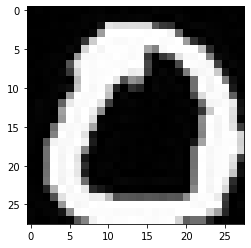

In [12]:
show_img = (normalizeVale[0]).reshape(28,28)
plt.imshow(show_img,cmap='gray')

print(labels[0])

In [13]:
maleDgt = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/maleDigits.csv')
maleDgt = np.array(maleDgt)
maleDgt

array([[  0,   2,   0, ...,   1,   1, 112],
       [  0,   0,   0, ...,   0,   0, 112],
       [  1,   0,   0, ...,   1,   2, 112],
       ...,
       [  0,   0,   0, ...,   1,   0, 121],
       [  0,   1,   1, ...,   0,   0, 121],
       [  2,   0,   1, ..., 186,  14, 121]])

In [14]:
femaleDgt = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/femaleDigits.csv')
#female.head()
femaleDgt = np.array(femaleDgt)
femaleDgt

array([[  0,   0,   0, ...,   3,   1, 112],
       [  0,   0,   0, ...,   1,   1, 112],
       [  0,   0,   1, ...,   0,   0, 112],
       ...,
       [  0,   0,   0, ...,   0,   0, 121],
       [  1,   1,   1, ...,   0,   0, 121],
       [  1,   2,   0, ...,   1,   0, 121]])

In [15]:
### male label 0

lvl = maleDgt.shape
maleDgt[:,(lvl[1]-1)] = 0
maleDgt

array([[  0,   2,   0, ...,   1,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   1,   2,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   1,   1, ...,   0,   0,   0],
       [  2,   0,   1, ..., 186,  14,   0]])

In [16]:
### female label 1

lvl = femaleDgt.shape
femaleDgt[:,(lvl[1]-1)] = 1
femaleDgt

array([[0, 0, 0, ..., 3, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 2, 0, ..., 1, 0, 1]])

In [17]:
#concate both male and female dataset
dataset = np.vstack((maleDgt, femaleDgt))
dataset

array([[0, 2, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 2, 0, ..., 1, 0, 1]])

In [18]:
x = dataset[:,:-1]
y = dataset[:,(lvl[1]-1)]
#### 28*28
n_samples,n_feature = x.shape

In [19]:
#### Using scikit-learn 
### train data 90%
### test data 10%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [20]:
print(len(x_train)," ",len(x_test)," ",len(y_train)," ",len(y_test))

27747   3083   27747   3083


In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))

In [23]:
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [24]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

#**Settings #1**

*   **Batch Size = 100**
*   **Number of iterations = 6000**
*   **Learning Rate = 0.01**
*   **Num of Hidden Nodes = 100**



In [67]:
# Hyperparameters

batch_size = 100
num_iters = 6000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 1
learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [68]:
num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)
num_epochs

19

### Step #1 : Design  model using class

In [69]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.sigmoid = nn.Sigmoid()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.sigmoid(out)
        # Linear layer (output)
        probas  =torch.sigmoid(self.linear_out(out))
        return probas

In [70]:
'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)

###Step #2 : Construct loss and optimizer

In [71]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

###Step #3 : Training

In [72]:
iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted=model(x_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%2 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total

    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())

Epoch: 2. Loss: 0.695216715335846. Accuracy: 50.4703211157963
Epoch: 4. Loss: 0.6948570609092712. Accuracy: 50.53519299383717
Epoch: 6. Loss: 0.6945460438728333. Accuracy: 51.05416801816413
Epoch: 8. Loss: 0.6942723393440247. Accuracy: 51.508271164450214
Epoch: 10. Loss: 0.6940276622772217. Accuracy: 51.475835225429776
Epoch: 12. Loss: 0.693805456161499. Accuracy: 51.73532273759325
Epoch: 14. Loss: 0.693600594997406. Accuracy: 51.57314304249108
Epoch: 16. Loss: 0.6934094429016113. Accuracy: 51.865066493674995
Epoch: 18. Loss: 0.693229079246521. Accuracy: 51.897502432695426


#**Settings #2**

## One Layer Neural Network with Tanh Activation
*   **Batch Size = 100**
*   **Number of iterations = 6000**
*   **Learning Rate = 0.01**
*   **Num of Hidden Nodes = 100**

In [77]:
# Hyperparameters

batch_size = 100
num_iters = 6000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 1
learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [78]:
num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)
num_epochs

19

In [26]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear layer (output)
        probas  = torch.sigmoid(self.linear_out(out))
        return probas

In [93]:
'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)

In [94]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [95]:
 iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted = model(x_train)
  loss = criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%2 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total

    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())

Epoch: 2. Loss: 0.6918151378631592. Accuracy: 53.25981187155368
Epoch: 4. Loss: 0.6910211443901062. Accuracy: 53.778786895880636
Epoch: 6. Loss: 0.6902663707733154. Accuracy: 54.135582225105416
Epoch: 8. Loss: 0.6895477771759033. Accuracy: 54.29776192020759
Epoch: 10. Loss: 0.6888629794120789. Accuracy: 54.200454103146285
Epoch: 12. Loss: 0.6882092952728271. Accuracy: 54.23289004216672
Epoch: 14. Loss: 0.6875849366188049. Accuracy: 54.4923775543302
Epoch: 16. Loss: 0.6869878172874451. Accuracy: 54.881608822575416
Epoch: 18. Loss: 0.6864161491394043. Accuracy: 55.17353227375933


#**Settings #3**
## Two Layer Neural Network (Deep) with ReLU Activation
*   **Batch Size = 100**
*   **Number of iterations = 10000**
*   **Learning Rate = 0.01**
*   **Num of Hidden Nodes = 100**


In [34]:
# Hyperparameters

batch_size = 100
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 1
learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        # Linear layer (output)
        probas  = torch.sigmoid(self.linear_out(out))
        return probas

'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted = model(x_train)
  loss = criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%2 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total

    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())


Epoch: 2. Loss: 0.6981658339500427. Accuracy: 51.475835225429776
Epoch: 4. Loss: 0.6968957185745239. Accuracy: 51.80019461563412
Epoch: 6. Loss: 0.6957031488418579. Accuracy: 52.0596821277976
Epoch: 8. Loss: 0.694581925868988. Accuracy: 52.221861822899776
Epoch: 10. Loss: 0.6935266852378845. Accuracy: 52.35160557898151
Epoch: 12. Loss: 0.6925323009490967. Accuracy: 52.48134933506325
Epoch: 14. Loss: 0.691594123840332. Accuracy: 52.9030165423289
Epoch: 16. Loss: 0.6907081604003906. Accuracy: 53.097632176451505
Epoch: 18. Loss: 0.6898704767227173. Accuracy: 53.097632176451505
Epoch: 20. Loss: 0.6890777349472046. Accuracy: 53.065196237431074
Epoch: 22. Loss: 0.6883265376091003. Accuracy: 53.45442750567629
Epoch: 24. Loss: 0.6876142621040344. Accuracy: 53.778786895880636
Epoch: 26. Loss: 0.6869379878044128. Accuracy: 54.200454103146285
Epoch: 28. Loss: 0.6862953305244446. Accuracy: 54.265325981187154
Epoch: 30. Loss: 0.6856841444969177. Accuracy: 54.36263379824846
Epoch: 32. Loss: 0.685102

#**Settings #4**
## Four Layer Neural Network (Deep) with ReLU Activation
*   **Batch Size = 100**
*   **Number of iterations = 10000**
*   **Learning Rate = 0.01**
*   **Num of Hidden Nodes = 100**


In [33]:
# Hyperparameters

batch_size = 100
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 1
learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)
        

        # Linear layer (output)
        probas  = torch.sigmoid(self.linear_out(out))
        return probas

'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted = model(x_train)
  loss = criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%2 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total

    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())


Epoch: 2. Loss: 0.6976717114448547. Accuracy: 51.475835225429776
Epoch: 4. Loss: 0.6962637305259705. Accuracy: 52.286733700940644
Epoch: 6. Loss: 0.6949678063392639. Accuracy: 52.61109309114499
Epoch: 8. Loss: 0.6937716603279114. Accuracy: 52.8057087252676
Epoch: 10. Loss: 0.692664623260498. Accuracy: 53.29224781057412
Epoch: 12. Loss: 0.6916372776031494. Accuracy: 53.71391501783977
Epoch: 14. Loss: 0.690681517124176. Accuracy: 54.00583846902368
Epoch: 16. Loss: 0.6897899508476257. Accuracy: 54.459941615309766
Epoch: 18. Loss: 0.6889563202857971. Accuracy: 55.07622445669802
Epoch: 20. Loss: 0.6881751418113708. Accuracy: 54.978916639636715
Epoch: 22. Loss: 0.6874412894248962. Accuracy: 55.07622445669802
Epoch: 24. Loss: 0.6867504715919495. Accuracy: 55.2384041518002
Epoch: 26. Loss: 0.6860988140106201. Accuracy: 55.53032760298411
Epoch: 28. Loss: 0.685482919216156. Accuracy: 55.85468699318845
Epoch: 30. Loss: 0.6848997473716736. Accuracy: 55.82225105416802
Epoch: 32. Loss: 0.68434649705

**Result Table:-**

| Settings #1      | Settings #2     | Settings #3     | Settings #4     |
| :------------- | :----------: | -----------: | -----------: |
|  Batch Size = 100 | Batch Size = 100  | Batch Size = 100    |Batch Size = 100    |
|  Number of iterations = 6000 | Number of iterations = 6000   | Number of iterations = 10000    | Number of iterations = 10000    |
|  Learning Rate = 0.01 | Learning Rate = 0.01   | Learning Rate = 0.01 |Learning Rate = 0.01 |
|Num of Hidden Nodes = 100|Num of Hidden Nodes = 100|Num of Hidden Nodes = 100|Num of Hidden Nodes = 100|
| Accuracy : 51.89  | Accuracy : 55.17 | Accuracy : 54.71 |Accuracy : 55.95 | |
